# O8 Fraunhofersche Beugung

Santiago R. , 24.3.2021

In [381]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Messwerte

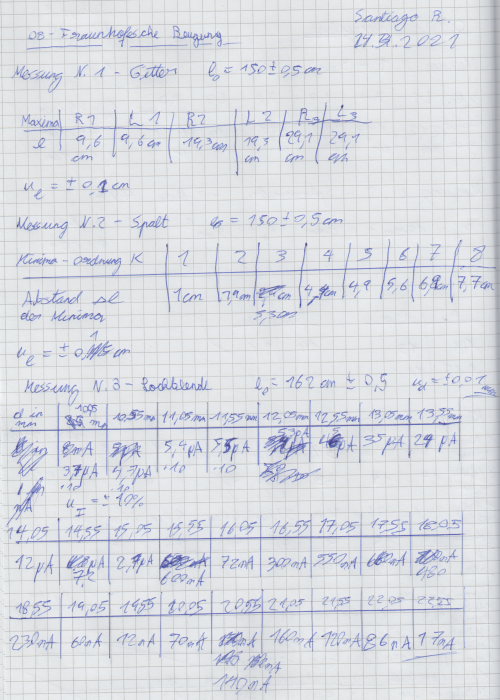

In [382]:
from IPython.display import Image
Image(filename='Messwerte.png', width = 800, height = 300)

# Gitter

In [383]:
#Gitter
l_0 = 150
u_l0 = 0.5
k = np.array([-3,-2,-1,1,2,3])
l = np.array([-29.1,-19.3,-9.6,9.6,19.3,29.1])
alpha = np.arctan(np.array([-29.1,-19.3,-9.6,9.6,19.3,29.1])/l_0)
u_l = np.ones(len(l))*0.1
u_alpha = np.sqrt((u_l/(l_0*(1+l**2/l_0**2)))**2+(l*u_l0/(l_0**2*(1+l**2/l_0**2)))**2)

Für das von einem Gitter mit Gitterkonstante $g$ erzeugte Interferenzmuster gilt in Abhängigkeit der Ordnung k der abgebildeten Maxima für den Beugungswinkel $\alpha$ <br>
$sin(\alpha _k) = k \frac{\lambda}{g}$ <br>

Lambda =  636.3 +/- 0.8 nm


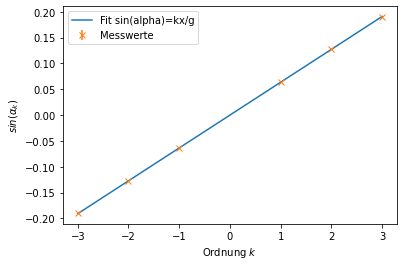

In [384]:
def sin_alpha_k(k,lamda):
    g = 10**(-5)
    sin = k*lamda/g
    return sin
popt, pcov = curve_fit(sin_alpha_k,k,np.sin(alpha), sigma=u_alpha)
plt.plot(k,sin_alpha_k(k,*popt), label="Fit sin(alpha)=kx/g")
plt.errorbar(k,np.sin(alpha), yerr=u_alpha,fmt='o',marker='x',label="Messwerte")
plt.ylabel(r'$sin(\alpha _k)$')
plt.xlabel("Ordnung "r'$k$')
plt.legend(loc="upper left")
plt.savefig("FitGitter.pdf")
print("Lambda = ", np.round(popt[0]*1e9,1), "+/-", np.round(pcov[0,0]**0.5*1e9,1), "nm")

In [385]:
def residuals(f, popt, x, y, res_name):
    residuals = y - f(x,*popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    R_2 = 1 - (ss_res / ss_tot)
    plt.scatter(x,residuals, label='Residuen, R^2 ='+str(np.round(R_2,7)))
    plt.xlabel("x-Werte")
    plt.ylabel("Differenz y-f(x)")
    plt.ylim(-np.abs(max(residuals))*1.5, np.abs(max(residuals))*1.5)
    plt.legend(loc="upper right", prop={'size': 8})
    plt.gca().set_aspect(aspect=int(1/(np.abs(max(residuals))*1.5)))
    #plt.rcParams["figure.figsize"] = (8,1)
    plt.savefig("Residuen"+res_name+".pdf", bbox_inches = "tight")
    print("R^2 =", R_2)

R^2 = 0.9999933316026048


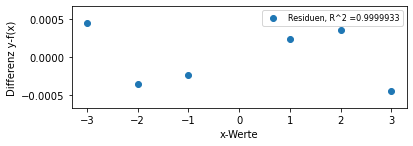

In [386]:
residuals(sin_alpha_k, popt, k, np.sin(alpha), "Gitter")

# Spalte

Für das von einem Einfachspalt mit Spaltbreite $b$ erzeugte Interferenzmuster gilt in Abhängigkeit der Ordnung k der abgebildeten Minima für den Beugungswinkel $\alpha$ <br>
$sin(\alpha _k) = k \frac{\lambda}{b}$ <br>

In [387]:
#Spalt
l_0 = 150
u_l0 = 0.5
k = np.array([1,2,3,4,5,6,7,8])
delta_l = np.arctan(np.array([1, 1.9,3.3,4.4,4.9,5.6,6.9,7.7])/(2*l_0))
u_l = np.ones(len(delta_l))*0.2
u_alpha = np.sqrt((u_l/(l_0*(1+delta_l**2/l_0**2)))**2+(delta_l*u_l0/(l_0**2*(1+delta_l**2/l_0**2)))**2)

b =  0.194 +/- 0.004 mm


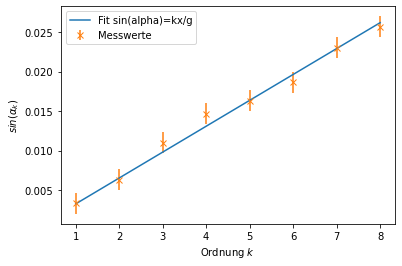

In [388]:
def sin_alpha_k(k,b):
    lamda = 636.3
    sin = k*lamda/b
    return sin
popt, pcov = curve_fit(sin_alpha_k,k,np.sin(delta_l), sigma=u_alpha)
plt.plot(k,sin_alpha_k(k,*popt), label="Fit sin(alpha)=kx/g")
plt.errorbar(k,np.sin(delta_l), yerr=u_alpha,fmt='o',marker='x',label="Messwerte")
plt.ylabel(r'$sin(\alpha _k)$')
plt.xlabel("Ordnung "r'$k$')
plt.legend(loc="upper left")
plt.savefig("FitSpalte.pdf")
print("b = ", np.round(popt[0]/1e6,3), "+/-", np.round(pcov[0,0]**0.5/1e6,3), "mm")

R^2 = 0.9877332747909656


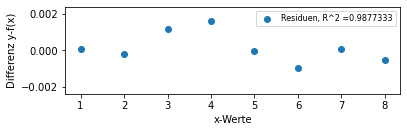

In [389]:
residuals(sin_alpha_k, popt, k, np.sin(delta_l), "Spalt")

# Lochblende

Bei der Lochblende kann der Intensitätsverlauf $I(\alpha)$ nach einer Besselfunktion $J_1$ erster Ordnung beschrieben werden mit <br>
$I(\alpha) = I_0 \left[\frac{J_1\left(\theta (\alpha)/2\right)}{\theta (\alpha)/4}\right] ^2 + I_{noise}$ mit $\theta (\alpha) = \frac{2\pi B sin(\alpha)}{\lambda}$ <br>
Aus den Messungen für die Position $x$ bezüglich des zentralen Einfallspunktes $x_0$ des gebeugten Laserstrahls in einem Abstand $l_0$ zur Lochblende ergibt sich für den Beugungswinkel $\alpha$ <br>
$tan(\alpha) = \frac{|x-x_0|}{l_0} $ <br>
Im Sinne der Konvergenz des numerischen Fit-Algorithmus kann die obige Beziehung aufgrund der sehr kleinen radialen Ablenkung des Laserstrahls vereinfacht angenähert werden als <br>
$sin(\alpha) \approx \alpha \approx tan(\alpha) = \frac{|x-x_0|}{l_0} $ <br>
Damit folgt dann für die oberen Gleichungen mit $A = \frac{B}{\lambda l_0}$ <br>
$\theta (x) = 2\pi A |x-x_0| \Rightarrow I(x) = I_0 \left[\frac{J_1\left(\pi A |x-x_0| \right)}{\pi A |x-x_0|/2}\right] ^2 + I_{noise}$

In [390]:
#Lochblende
l_0 = 162*10 #in mm
u_l0 = 0.5*10
d = np.arange(10.05,23.05,0.5) #in mm
u_d = 0.01
I = np.array([37*1e3,47*1e3,54*1e3,55*1e3,53*1e3,45*1e3,35*1e3,24*1e3,12*1e3,7.2*1e3,2.7*1e3,600,72,300,550,680,480,230,60,12,70,140,160,120,86,17]) #in nA
u_I = I*0.2

A =  0.29 +/- 0.003 1/mm
I_0 =  44.529 +/- 2.679 uA
I_noise =  7.83 +/- 2.693 nA
x_0 =  11.731 +/- 0.071 mm


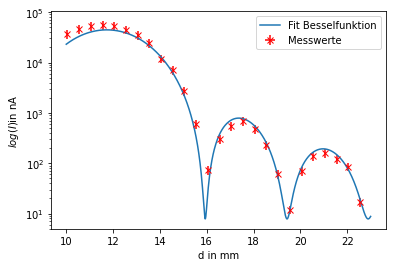

In [391]:
from scipy.special import jv
def bessel(x, A, I_0, I_noise, x_0):
    Bessel = jv(1,np.pi*A*np.abs(x-x_0))
    I = I_0*(Bessel/(np.pi*A*np.abs(x-x_0)/2))**2 + I_noise
    return I
Bessel_Guess = np.array([0.3,3600,0.01,13])
x_test = np.linspace(10,23,1000)
popt, pcov = curve_fit(bessel,d,I, Bessel_Guess, sigma=u_I)
plt.plot(x_test, bessel(x_test, *popt), label="Fit Besselfunktion")
plt.errorbar(d,I, xerr= u_d, yerr=u_I,fmt='o',marker='x',label="Messwerte", color="red")
plt.yscale("log")
plt.ylabel(r'$log(I)$'"in nA")
plt.xlabel("d in mm")
plt.legend(loc="upper right")
plt.savefig("FitBessel.pdf")
print("A = ", np.round(popt[0],3), "+/-", np.round(pcov[0,0]**0.5,3), "1/mm")
print("I_0 = ", np.round(popt[1]/1e3,3), "+/-", np.round(pcov[1,1]**0.5/1e3,3), "uA")
print("I_noise = ", np.round(popt[2],3), "+/-", np.round(pcov[2,2]**0.5,3), "nA")
print("x_0 = ", np.round(popt[3],3), "+/-", np.round(pcov[3,3]**0.5,3), "mm")

/home/santi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  # This is added back by InteractiveShellApp.init_path()


R^2 = 0.9251910377313967
[ 1.30006537e+04  1.39008605e+04  1.35815997e+04  1.07651027e+04
  9.39594948e+03  6.31604892e+03  4.31951537e+03  2.56472873e+03
 -8.24984268e+02  9.90820913e+02  5.73378075e+02  2.79899554e+02
  4.45830850e+01 -7.80571864e+01 -1.70139038e+02 -8.61311603e+01
 -6.71378936e+01 -2.09626168e+01  8.48663899e+00  4.51204890e-01
 -1.20429495e+01 -2.62207030e+01 -3.19575484e+01 -2.81638575e+01
  1.21809062e+01 -2.12197042e+00]


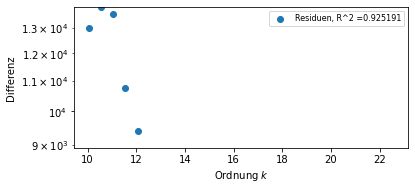

In [392]:
y = I
x = d
residuals = y - bessel(x, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y-np.mean(y))**2)
R_2 = 1 - (ss_res / ss_tot)
plt.scatter(x,residuals, label='Residuen, R^2 ='+str(np.round(R_2,7)))
plt.xlabel("Ordnung "r'$k$')
plt.ylabel("Differenz ")
plt.yscale("log")
plt.ylim(-max(np.abs(residuals)),max(np.abs(residuals)))
plt.legend(loc="upper right", prop={'size': 8})
plt.gca().set_aspect(aspect=30)
#plt.rcParams["figure.figsize"] = (8,1)
plt.savefig("ResiduenBlende.pdf", bbox_inches = "tight")
print("R^2 =", R_2)
print(residuals)

Für den Blendendurchmesser $B$ gilt dann <br>
$B = A \lambda l_0$, $u_B = \sqrt{(A \lambda u_{l_0})^2+( \lambda l_0 u_{A})^2+(A l_0 u_{\lambda})^2}$ <br>

In [393]:
def B(A, u_A):
    l_0 = 162*10 #in mm
    u_l0 = 0.5*10
    lamda = 636.3/1e6
    u_lamda = 0.8/1e6
    B = A*lamda*l_0
    u_B = np.sqrt((A*lamda*u_l0)**2+(l_0*lamda*u_A)**2+(A*l_0*u_lamda)**2)
    return B, u_B
b = np.round(B(popt[0],pcov[0,0]**0.5),3)
print("B = ",b[0], "+/-", b[1], "mm")

B =  0.299 +/- 0.003 mm
